# Evaluate model in paper Machine Learning for Trading
Link [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3015609)

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())
os.chdir(path.parent.absolute())

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_ta as ta
from stable_baselines3.dqn import DQN
from stable_baselines3.ppo import PPO
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy
import mt4_hst
import stock_env
from stock_env.utils import *
from stock_env.envs.vn_stock_env import VietnamStockEnv
from stable_baselines3.common.env_checker import check_env
%matplotlib inline

In [8]:
FPT = mt4_hst.read_hst("stock_env/datasets/FPT1440.hst")
FPT = FPT[FPT['time'] >= '2012-01-01']
env = VietnamStockEnv(
    df=FPT,
    max_trade_lot=5,
    max_lot=10,
    init_cash=5e3)
check_env(env)
# model = DQN.load("log/ppo_VietnamStock", env=env)
model = PPO.load("log/ppo_VietnamStock", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [9]:
columns = 'time close delta_shares quantity portfolio_value nav cash'.split()
df = pd.read_csv('temp/history.csv')
df = df[columns]
buy = df[df['delta_shares'] < 0]
df['delta_shares'].describe()

count    2583.000000
mean        0.387147
std        13.910370
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       500.000000
Name: delta_shares, dtype: float64

In [10]:
df = pd.read_csv('temp/history.csv')
df.sort_values(by='time', inplace=True)
df.index = pd.to_datetime(df['time'])
portfolio_value = df['portfolio_value']

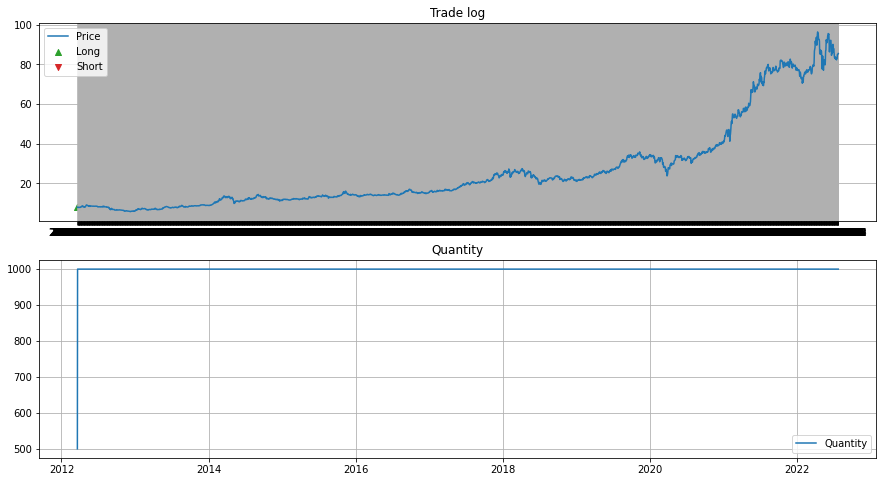

In [11]:
plot_trade_log_v2(df)


    Annual return     :  31.88%
    Cumulative return :  1604.78%
    Sharpe ratio      :  0.99
    Maximum Drawdown  : -57.81%
    Annual Volatility :  33.46%
    Value-At-Risk     :  nan%
    


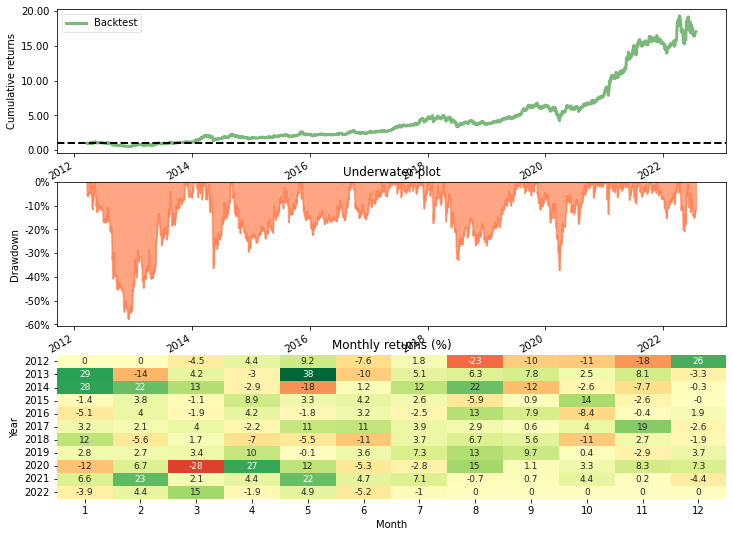

In [13]:
create_performance(portfolio_value.pct_change())